## Business Questions
Q1. How satisfied are individuals with their jobs in terms of salary?

Q2. Which profession is the most preferred by individuals?

Q3. Which profession is the most rewarding in terms of salary?

Q4. How does work load vary with compensation?

Q5. What web frameworks are most used by web developers?

Q6. Which languages are most used by data scientists?

Q7. What languages are most used by people working with data?

Q8. What languages are most used by mobile developers?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data exploration

Let's read the data for the stackoverflow survey results.

In [3]:
# Read the data
df = pd.read_csv('../data/external/survey_results_public.csv')

In [4]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [5]:
print('There are {0} records and {1} features'.format(df.shape[0], df.shape[1]))

There are 88883 records and 85 features


In [6]:
df_columns = list(df.columns)
print(df_columns)

['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOVisi

In [7]:
def get_quantitative_columns():
    """
    Returns a list of column names that contain quantitative data
    """
    quantitative_data = df.select_dtypes(exclude=['object'])
    return list(quantitative_data.columns)

In [8]:
def get_categorical_columns():
    """
    Returns a list of column names that contain categorical data
    """
    categorical_data = df.select_dtypes(include=['object'])
    return list(categorical_data.columns)

In [9]:
# Columns with null values
print(list(df.columns[df.isnull().any()]))

['MainBranch', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith', 'PlatformDesireNextYear', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved', 'SOH

Seems like almost every other column has some missing values

In [10]:
# Columns with no missing values
set(df.columns[df.isnull().mean() == 0])

{'Hobbyist', 'OpenSourcer', 'Respondent'}

Only three columns have all values in place.

In [11]:
# Find columns with most missing values
def get_columns_with_missing_values(ratio):
    """
    Returns a list of column names with missing values
    """
    return list(df.columns[df.isnull().mean() > ratio])

In [12]:
print(get_columns_with_missing_values(0.75))

[]


In [13]:
print(get_columns_with_missing_values(0.5))

[]


In [14]:
print(get_columns_with_missing_values(0.25))

['MgrIdiot', 'MgrMoney', 'MgrWant', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'WebFrameWorkedWith', 'WebFrameDesireNextYear', 'MiscTechWorkedWith', 'MiscTechDesireNextYear', 'BlockchainOrg', 'BlockchainIs']


## Data Analysis - DevType

In [15]:
# Let's consider the DevType column:
print(df['DevType'].value_counts())

Developer, full-stack                                                                                                                                                                                  8433
Developer, back-end                                                                                                                                                                                    4913
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                         2399
Developer, front-end                                                                                                                                                                                   2212
Developer, mobile                                                                                                                                                                       

In [16]:
print('There are {} records with developer type not available'.format(df['DevType'].isna().sum()))

There are 7548 records with developer type not available


In [17]:
def get_unique_values_list(input_df, column_name, separator=';', remove_values=[]):
    """
    Get list of unique values from a column
    Args:
        input_df -- The dataframe to work on
        column_name -- { String } Column from which to get unique values
        separator -- { String } Unique value separator (defaults to ;)
        remove_values -- { List } List of values to remove from the final list (defaults to [])
    Returns:
        A list of unique values for the given column
    """
    all_values_list = input_df[column_name].astype(str).unique()
    output_list = []
    for row in all_values_list:
        for entry in row.split(separator):
            if entry in output_list:
                True
            else:
                output_list.append(entry)
    for value in remove_values:
        if (value in output_list):
            output_list.remove(value)

    return output_list

## Data Cleaning - DevType

In [18]:
# Remove records with DevType as Student or nan
dev_types_to_remove = ['Student', 'nan']
all_dev_types_list = get_unique_values_list(input_df=df, column_name='DevType', remove_values=dev_types_to_remove)

In [19]:
print(all_dev_types_list)

['Developer, desktop or enterprise applications', 'Developer, front-end', 'Designer', 'Developer, back-end', 'Developer, full-stack', 'Academic researcher', 'Developer, mobile', 'Data or business analyst', 'Data scientist or machine learning specialist', 'Database administrator', 'Engineer, data', 'Engineer, site reliability', 'Developer, QA or test', 'DevOps specialist', 'Developer, game or graphics', 'Educator', 'Engineering manager', 'Senior executive/VP', 'System administrator', 'Developer, embedded applications or devices', 'Product manager', 'Scientist', 'Marketing or sales professional']


In [20]:
def create_feature_columns(input_df, values, parent_col, prefix='', preprocessor=None):
    """
    Creates feature columns
    Args:
        input_df -- The dataframe to work on
        values -- { List } List of values based on which to create columns
        parent_col -- { String } Column from which we are creating features
        prefix -- { String } String to prefix column names with (defaults to '')
        preprocessor -- { Lambda function } Used for preprocessing the column name before adding to the dataframe (defaults to None)
    Returns:
        List of new column names added to the dataframe
    """
    new_col_list = []
    
    for value in values:
        new_df = input_df[parent_col].apply(lambda x: 1 if value in x else 0)
        if preprocessor is not None:
            value = preprocessor(value) 
        if prefix+value in input_df:
            input_df[prefix+value] = input_df[prefix+value] | new_df
        else:
            input_df[prefix+value] = new_df
            new_col_list.append(prefix+value)

    return new_col_list

In [21]:
# Drop rows where DevType is a null value
df_with_dev_types = df.dropna(subset=['DevType'], axis=0)

In [22]:
# Create columns based on developer type
dev_type_preprocessor = lambda x: ' '.join([e for e in reversed(x.split(','))])
dev_type_columns = create_feature_columns(input_df=df_with_dev_types,
                                          values=all_dev_types_list,
                                          preprocessor=dev_type_preprocessor,
                                          parent_col='DevType', 
                                          prefix='dev_type_')
print(dev_type_columns)

<ipython-input-20-dde717315dca>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[prefix+value] = new_df


['dev_type_ desktop or enterprise applications Developer', 'dev_type_ front-end Developer', 'dev_type_Designer', 'dev_type_ back-end Developer', 'dev_type_ full-stack Developer', 'dev_type_Academic researcher', 'dev_type_ mobile Developer', 'dev_type_Data or business analyst', 'dev_type_Data scientist or machine learning specialist', 'dev_type_Database administrator', 'dev_type_ data Engineer', 'dev_type_ site reliability Engineer', 'dev_type_ QA or test Developer', 'dev_type_DevOps specialist', 'dev_type_ game or graphics Developer', 'dev_type_Educator', 'dev_type_Engineering manager', 'dev_type_Senior executive/VP', 'dev_type_System administrator', 'dev_type_ embedded applications or devices Developer', 'dev_type_Product manager', 'dev_type_Scientist', 'dev_type_Marketing or sales professional']


In [23]:
# Save df with dev_types_* columns
df_with_dev_types.to_csv('../data/interim/survey_results_public_with_dev_types.csv', index=False)

In [24]:
# Read df with dev_types_* columns
df_with_dev_types = pd.read_csv('../data/interim/survey_results_public_with_dev_types.csv')

## Data Analysis - ConvertedComp

In [25]:
df_with_dev_types['ConvertedComp'].head()

0         NaN
1      8820.0
2     61000.0
3         NaN
4    366420.0
Name: ConvertedComp, dtype: float64

In [26]:
df_with_dev_types[['ConvertedComp', 'CompTotal']].isna().sum()

ConvertedComp    26254
CompTotal        26138
dtype: int64

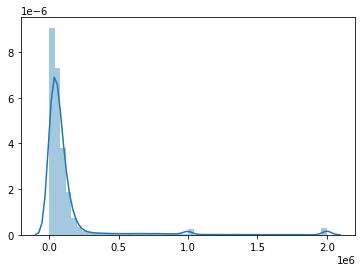

In [28]:
sns.distplot(df_with_dev_types[['ConvertedComp']])

As we can see, the **ConvertedComp** column is left-skewed

## Data Cleaning - ConvertedComp

In [811]:
# Remove null values from ConvertedComp column
df_with_dev_types = df_with_dev_types.dropna(subset=['ConvertedComp'], axis=0)

In [812]:
df_with_dev_types[['ConvertedComp', 'CompTotal']].isna().sum()

ConvertedComp    0
CompTotal        0
dtype: int64

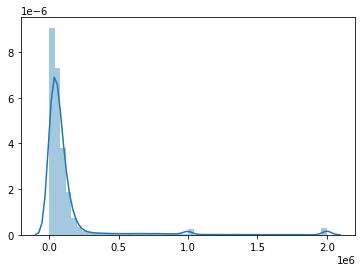

In [30]:
sns.distplot(df_with_dev_types[['ConvertedComp']])

The ConvertedComp column is still left-skewed!

In [814]:
def get_salary_range(x):
    """
    Classify salaries across different ranges
    """
    x = int(x)
    if (x in range(0, 250000)):
        return 'S1'
    
    if (x in range(250000, 500000)):
        return 'S2'
    
    if (x in range(500000, 750000)):
        return 'S3'
    
    if (x in range(750000, 1000000)):
        return 'S4'
    
    if (x in range(1000000, 1250000)):
        return 'S5'
    
    if (x in range(1250000, 1500000)):
        return 'S6'
    
    if (x in range(1500000, 1750000)):
        return 'S7'
    
    if (x in range(1750000, 2000000)):
        return 'S8'

Create a new column named **CompRange** for salary ranges.

In [815]:
df_with_dev_types['CompRange'] = df_with_dev_types['ConvertedComp'].apply(get_salary_range)

In [816]:
df_with_dev_types.groupby('CompRange').count()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,dev_type_DevOps specialist,dev_type_ game or graphics Developer,dev_type_Educator,dev_type_Engineering manager,dev_type_Senior executive/VP,dev_type_System administrator,dev_type_ embedded applications or devices Developer,dev_type_Product manager,dev_type_Scientist,dev_type_Marketing or sales professional
CompRange,,,,,,,,,,,,,,,,,,,,,
S1,51012,51012,51012,51012,50286,51012,51012,50705,50264,46816,...,51012,51012,51012,51012,51012,51012,51012,51012,51012,51012
S2,1110,1110,1110,1110,1089,1110,1110,1107,1100,1034,...,1110,1110,1110,1110,1110,1110,1110,1110,1110,1110
S3,710,710,710,710,700,710,710,709,696,645,...,710,710,710,710,710,710,710,710,710,710
S4,600,600,600,600,591,600,600,597,593,558,...,600,600,600,600,600,600,600,600,600,600
S5,694,694,694,694,689,694,694,691,680,640,...,694,694,694,694,694,694,694,694,694,694
S6,118,118,118,118,118,118,118,118,118,110,...,118,118,118,118,118,118,118,118,118,118
S7,92,92,92,92,90,92,92,91,92,88,...,92,92,92,92,92,92,92,92,92,92
S8,49,49,49,49,48,49,49,49,49,47,...,49,49,49,49,49,49,49,49,49,49


In [817]:
df_with_dev_types.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55081 entries, 1 to 81070
Columns: 109 entries, Respondent to CompRange
dtypes: float64(5), int64(24), object(80)
memory usage: 29.4+ MB


## Data Analysis - Year related columns

In [818]:
# year columns
year_cols = ['YearsCode', 'YearsCodePro', 'Age1stCode', 'Age']

In [819]:
df_with_dev_types[year_cols].isna().sum()

YearsCode         74
YearsCodePro     149
Age1stCode       132
Age             2231
dtype: int64

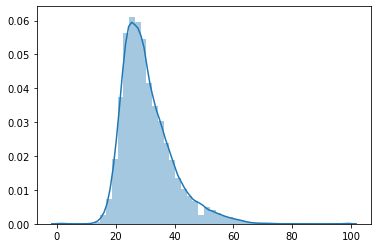

In [31]:
sns.distplot(df_with_dev_types[['Age']])

In [821]:
def mapper(x, mapped_data):
    """
    Maps values from one type to another
    Args:
        x -- { String } Value to map
        mapped_data -- { Dict } Dictionary of old to new mappings
    Returns:
        New mapped value
    """
    for key in mapped_data:
        if x == key:
            x = mapped_data[key]
    
    return x

In [822]:
df_with_dev_types.shape

(55081, 109)

## Data Cleaning - Year related Columns

There are values in the year related columns which are strings and need to be converted to meaningful numeric values. These columns include: YearsCode, YearsCodePro, Age1stCode, and Age.

In [823]:
year_mappings = {
    'Less than 1 year': 0.5, 
    'More than 50 years': 55, 
    'Younger than 5 years': 5, 
    'Older than 85': 90
}

# Map all values in these columns to integers
for col in year_cols:
    df_with_dev_types[col] = df_with_dev_types[col].apply(lambda x: mapper(x, year_mappings))

In [824]:
df_with_dev_types[year_cols]

,YearsCode,YearsCodePro,Age1stCode,Age
1,3,1,22,28.0
2,3,0.5,16,22.0
4,13,3,15,28.0
7,12,4,11,23.0
8,12,10,20,NaN
...,...,...,...,...
81065,12,3,14,26.0
81066,17,7,16,34.0
81068,18,9,17,37.0
81069,10,8,15,NaN


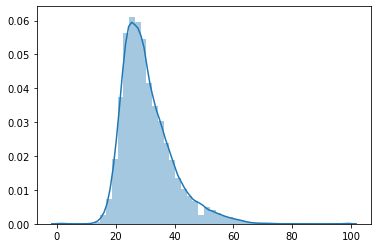

In [32]:
sns.distplot(df_with_dev_types[['Age']])

In [826]:
df_with_dev_types[year_cols].isna().sum()

YearsCode         74
YearsCodePro     149
Age1stCode       132
Age             2231
dtype: int64

There are still null values that exist in these columns!

In [827]:
df_with_dev_types.to_csv('../data/interim/survey_results_public_with_years_encoded_v2.csv', index=False)

In [828]:
df_with_years_encoded = pd.read_csv('../data/interim/survey_results_public_with_years_encoded_v2.csv')

## Data Analysis - CareerSat and JobSat

In [829]:
df_with_years_encoded['CareerSat'].value_counts()

Very satisfied                        22972
Slightly satisfied                    19227
Slightly dissatisfied                  5612
Neither satisfied nor dissatisfied     4660
Very dissatisfied                      2610
Name: CareerSat, dtype: int64

In [830]:
df_with_years_encoded['JobSat'].value_counts()

Slightly satisfied                    18987
Very satisfied                        17651
Slightly dissatisfied                  8510
Neither satisfied nor dissatisfied     6125
Very dissatisfied                      3761
Name: JobSat, dtype: int64

In [831]:
# Map job satisfaction and career satisfaction values to numeric values
sat_mappings = {
    'Very satisfied': 5,
    'Slightly satisfied': 4,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly dissatisfied': 2,
    'Very dissatisfied': 1
}

## Data Analysis - JobSat and CareerSat

In [832]:
df_with_years_encoded['JobSat'] = df_with_years_encoded['JobSat'].apply(lambda x: mapper(x, sat_mappings))
df_with_years_encoded['CareerSat'] = df_with_years_encoded['CareerSat'].apply(lambda x: mapper(x, sat_mappings))

In [833]:
df_with_years_encoded['JobSat'].value_counts()

4.0    18987
5.0    17651
2.0     8510
3.0     6125
1.0     3761
Name: JobSat, dtype: int64

In [834]:
df_with_years_encoded['CareerSat'].value_counts()

5    22972
4    19227
2     5612
3     4660
1     2610
Name: CareerSat, dtype: int64

In [835]:
df_with_years_encoded.to_csv('../data/interim/survey_results_public_with_job_sat_encoded_v3.csv', index=False)

In [836]:
df_with_job_sat_encoded = pd.read_csv('../data/interim/survey_results_public_with_job_sat_encoded_v3.csv')

## Data Analysis - Other features that might be worth looking at

In [837]:
df_with_job_sat_encoded['CompFreq'].value_counts()

Yearly     30097
Monthly    22930
Weekly      2054
Name: CompFreq, dtype: int64

In [838]:
df_with_job_sat_encoded['CompFreq'].isna().sum()

0

In [839]:
df_with_job_sat_encoded['OpenSourcer'].value_counts()

Never                                                 18904
Less than once per year                               16359
Less than once a month but more than once per year    13511
Once a month or more often                             6307
Name: OpenSourcer, dtype: int64

In [840]:
df_with_job_sat_encoded['Employment'].value_counts()

Employed full-time                                      48548
Independent contractor, freelancer, or self-employed     4500
Employed part-time                                       2033
Name: Employment, dtype: int64

In [841]:
df_with_job_sat_encoded['JobSeek'].value_counts()

I’m not actively looking, but I am open to new opportunities    33104
I am not interested in new job opportunities                    15776
I am actively looking for a job                                  6201
Name: JobSeek, dtype: int64

In [842]:
df_with_job_sat_encoded['MainBranch'].value_counts()

I am a developer by profession                                                   50124
I am not primarily a developer, but I write code sometimes as part of my work     4957
Name: MainBranch, dtype: int64

In [843]:
df_with_job_sat_encoded['OrgSize'].value_counts()

20 to 99 employees                                    11964
100 to 499 employees                                  10031
10,000 or more employees                               7689
1,000 to 4,999 employees                               5824
2-9 employees                                          5339
10 to 19 employees                                     5238
500 to 999 employees                                   3546
5,000 to 9,999 employees                               2318
Just me - I am a freelancer, sole proprietor, etc.     2300
Name: OrgSize, dtype: int64

## Data cleaning - MainBranch

I am more interested in individuals who are developer by profession.

In [844]:
# Keep only individuals whose primary job is being a developer
developer = 'I am a developer by profession'
df_with_only_devs = df_with_job_sat_encoded[df_with_job_sat_encoded['MainBranch'] == developer]

In [845]:
df_with_only_devs.shape

(50124, 109)

## Data cleaning - OrgSize

I am more interested in individuals who are part of an organization

In [846]:
# Remove OrgSize referring to freelancers
freelancer = 'Just me - I am a freelancer, sole proprietor, etc.'
df_with_only_devs = df_with_only_devs[df_with_only_devs['OrgSize'] != freelancer]

In [847]:
df_with_only_devs.to_csv('../data/interim/survey_results_public_with_only_devs_v4.csv', index=False)

In [850]:
df_with_only_prof_devs = pd.read_csv('../data/interim/survey_results_public_with_only_devs_v4.csv')

## Data cleaning - Age

I am interested in developers who are less than or equal to 55 years of age.

In [851]:
# Only keep developers less than or equal to 55 years of age
df_with_only_prof_devs = df_with_only_prof_devs[df_with_only_prof_devs['Age'] <= 55]

In [852]:
df_with_only_prof_devs.to_csv('../data/interim/survey_results_public_with_only_devs_age_lim_55_v5.csv', index=False)

In [34]:
df_with_only_devs_age_lim_55 = pd.read_csv('../data/interim/survey_results_public_with_only_devs_age_lim_55_v5.csv')

In [854]:
df_with_only_devs_age_lim_55.shape

(45654, 109)

In [855]:
df_with_only_devs_age_lim_55.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,dev_type_ game or graphics Developer,dev_type_Educator,dev_type_Engineering manager,dev_type_Senior executive/VP,dev_type_System administrator,dev_type_ embedded applications or devices Developer,dev_type_Product manager,dev_type_Scientist,dev_type_Marketing or sales professional,CompRange
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,0,0,0,0,0,0,0,0,0,S1
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,0,0,0,0,0,0,0,0,0,S1
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,0,0,1,1,1,0,0,0,0,S1
3,14,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,Germany,No,"Other doctoral degree (Ph.D, Ed.D., etc.)","Computer science, computer engineering, or sof...",...,0,0,0,0,0,0,0,0,0,S1
4,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,0,0,0,0,0,0,0,0,0,S2


## Data Analysis - BetterLife, WorkWeekHrs, JobFactors, WorkPlan, WorkChallenge, WorkRemote, WorkLoc

In [856]:
df_with_only_devs_age_lim_55['BetterLife'].value_counts()

Yes    28292
No     16580
Name: BetterLife, dtype: int64

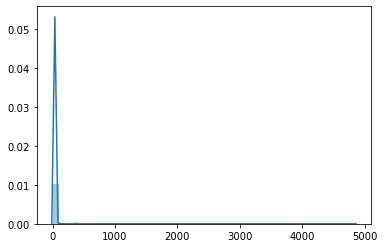

In [35]:
sns.distplot(df_with_only_devs_age_lim_55[['WorkWeekHrs']])

In [858]:
other_factors = ['JobFactors','WorkPlan', 'WorkChallenge', 'WorkRemote', 'WorkLoc']

In [859]:
df_with_only_devs_age_lim_55[other_factors[4]].value_counts()

Office                                            27150
Home                                              14451
Other place, such as a coworking space or cafe     3825
Name: WorkLoc, dtype: int64

In [860]:
df_with_only_devs_age_lim_55[other_factors[3]].value_counts()

Less than once per month / Never                           20564
A few days each month                                      11952
All or almost all the time (I'm full-time remote)           4569
Less than half the time, but at least one day each week     4305
It's complicated                                            1804
More than half, but not all, the time                       1276
About half the time                                         1100
Name: WorkRemote, dtype: int64

In [861]:
df_with_only_devs_age_lim_55[other_factors[2]].value_counts()

Being tasked with non-development work;Distracting work environment;Meetings                                                1574
Being tasked with non-development work;Meetings;Not enough people for the workload                                          1195
Distracting work environment;Meetings;Not enough people for the workload                                                    1049
Being tasked with non-development work;Distracting work environment;Not enough people for the workload                       998
Not enough people for the workload                                                                                           886
                                                                                                                            ... 
Being tasked with non-development work;Toxic work environment                                                                 71
Inadequate access to necessary tools;Toxic work environment                                      

In [862]:
df_with_only_devs_age_lim_55[other_factors[1]].value_counts()

There is a schedule and/or spec (made by me or by a colleague), and my work somewhat aligns     23886
There's no schedule or spec; I work on what seems most important or urgent                      12087
There is a schedule and/or spec (made by me or by a colleague), and I follow it very closely     8877
Name: WorkPlan, dtype: int64

In [863]:
df_with_only_devs_age_lim_55[other_factors[0]].value_counts()

Languages, frameworks, and other technologies I'd be working with;Office environment or company culture;Flex time or a flexible schedule              3222
Languages, frameworks, and other technologies I'd be working with;Office environment or company culture;Opportunities for professional development    3144
Languages, frameworks, and other technologies I'd be working with;Remote work options;Flex time or a flexible schedule                                2829
Languages, frameworks, and other technologies I'd be working with;Opportunities for professional development;Flex time or a flexible schedule         2044
Office environment or company culture;Opportunities for professional development;Flex time or a flexible schedule                                     1940
                                                                                                                                                      ... 
Financial performance or funding status of the company or organization

## Data cleaning - JobFactors

Map job factors to more meaningful classes

In [864]:
all_job_factors = get_unique_values_list(input_df=df_with_only_devs_age_lim_55, 
                                         column_name='JobFactors', 
                                         remove_values=['nan'])
print(all_job_factors)

["Languages, frameworks, and other technologies I'd be working with", 'Office environment or company culture', 'Opportunities for professional development', 'Financial performance or funding status of the company or organization', 'How widely used or impactful my work output would be', 'Remote work options', 'Flex time or a flexible schedule', "Industry that I'd be working in", 'Diversity of the company or organization', "Specific department or team I'd be working on"]


In [865]:
job_factors_mapping = {
    "Languages, frameworks, and other technologies I'd be working with": "Dream Tech",
    "Office environment or company culture": "Growth",
    "Opportunities for professional development": "Growth",
    "Financial performance or funding status of the company or organization": "Company Value",
    "How widely used or impactful my work output would be": "Growth",
    "Remote work options": "Flexibility",
    "Flex time or a flexible schedule": "Flexibility",
    "Industry that I'd be working in": "Dream Tech",
    "Diversity of the company or organization": "Company Value", 
    "Specific department or team I'd be working on": "Dream Tech"
}

job_factors_preprocessor = lambda x: job_factors_mapping[x]

In [866]:
df_with_only_devs_age_lim_55 = df_with_only_devs_age_lim_55.dropna(subset=['JobFactors'], axis=0)
job_factors_columns = create_feature_columns(input_df=df_with_only_devs_age_lim_55,
                                          values=all_job_factors,
                                          preprocessor=job_factors_preprocessor,
                                          parent_col='JobFactors', 
                                          prefix='job_factor_type_')
print(job_factors_columns)

['job_factor_type_Dream Tech', 'job_factor_type_Growth', 'job_factor_type_Company Value', 'job_factor_type_Flexibility']


## Data cleaning - WorkChallenge

Map work challenges to more meaningful classes

In [867]:
all_work_challenges = get_unique_values_list(input_df=df_with_only_devs_age_lim_55, 
                                         column_name='WorkChallenge', 
                                         remove_values=['nan'])
all_work_challenges

['Being tasked with non-development work',
 'Inadequate access to necessary tools',
 'Not enough people for the workload',
 'Meetings',
 'Non-work commitments (parenting, school work, hobbies, etc.)',
 'Distracting work environment',
 'Time spent commuting',
 'Lack of support from management',
 'Toxic work environment']

In [868]:
work_challenge_mapping = {
    'Being tasked with non-development work': 'Less resource',
    'Inadequate access to necessary tools': 'Less resource',
    'Not enough people for the workload': 'Less resource',
    'Meetings': 'Meetings',
    'Non-work commitments (parenting, school work, hobbies, etc.)': 'Outside work',
    'Distracting work environment': 'Bad work env',
    'Time spent commuting': 'Outside work',
    'Lack of support from management': 'Bad work env',
    'Toxic work environment': 'Bad work env'
}

work_challenge_preprocessor = lambda x: work_challenge_mapping[x]

In [869]:
df_with_only_devs_age_lim_55 = df_with_only_devs_age_lim_55.dropna(subset=['WorkChallenge'], axis=0)
work_challenge_columns = create_feature_columns(input_df=df_with_only_devs_age_lim_55,
                                          values=all_work_challenges,
                                          preprocessor=work_challenge_preprocessor,
                                          parent_col='WorkChallenge', 
                                          prefix='work_challenge_type_')
print(work_challenge_columns)

['work_challenge_type_Less resource', 'work_challenge_type_Meetings', 'work_challenge_type_Outside work', 'work_challenge_type_Bad work env']


In [870]:
# New compensation ranges
comp_ranges = list(df_with_only_devs_age_lim_55['CompRange'].astype(str).unique())
comp_ranges.remove('nan')
print(comp_ranges)

['S1', 'S2', 'S5', 'S4', 'S3', 'S6', 'S7', 'S8']


In [871]:
df_with_only_devs_age_lim_55.to_csv('../data/processed/survey_results_public_with_only_devs_age_lim_55.csv', index=False)

In [872]:
# Questions and Findings

In [873]:
df_with_only_devs_age_lim_55 = pd.read_csv('../data/processed/survey_results_public_with_only_devs_age_lim_55.csv')

## Findings based on Data Analysis and Data Visualization

### Q1. How satisfied are individuals with their jobs in terms of salary?

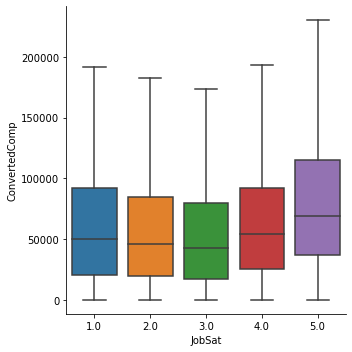

In [874]:
df_job_sat_and_comp = df_with_only_devs_age_lim_55[['JobSat', 'ConvertedComp', 'CareerSat']]
sns.catplot(x="JobSat", y="ConvertedComp", kind="box", data=df_job_sat_and_comp, sym='');

As we can see, job satisfaction does become better with compensation. The effect is more seen for individuals in the salary range of 0 to 280000 USD.

### Q2. Which profession is the most preferred by individuals?

In [875]:
records = {
    'dev_type': [],
    'salary_type': [],
    'count': []
}

for idx, c_range in enumerate(comp_ranges):
    c_range_df = df_with_only_devs_age_lim_55[df_with_only_devs_age_lim_55['CompRange'] == c_range]
    for col in dev_type_columns:
        df_with_dev_types_col_set = c_range_df[c_range_df[col] == 1]
        records['count'].append(df_with_dev_types_col_set.shape[0])
        records['salary_type'].append(c_range)
        records['dev_type'].append(col)

records_dict =  pd.DataFrame.from_dict(records)
records_dict = records_dict.sort_values(by="count", ascending=False)
records_dict.head()

,dev_type,salary_type,count
4,dev_type_ full-stack Developer,S1,24210
3,dev_type_ back-end Developer,S1,22625
1,dev_type_ front-end Developer,S1,14408
0,dev_type_ desktop or enterprise applications D...,S1,9208
6,dev_type_ mobile Developer,S1,7589


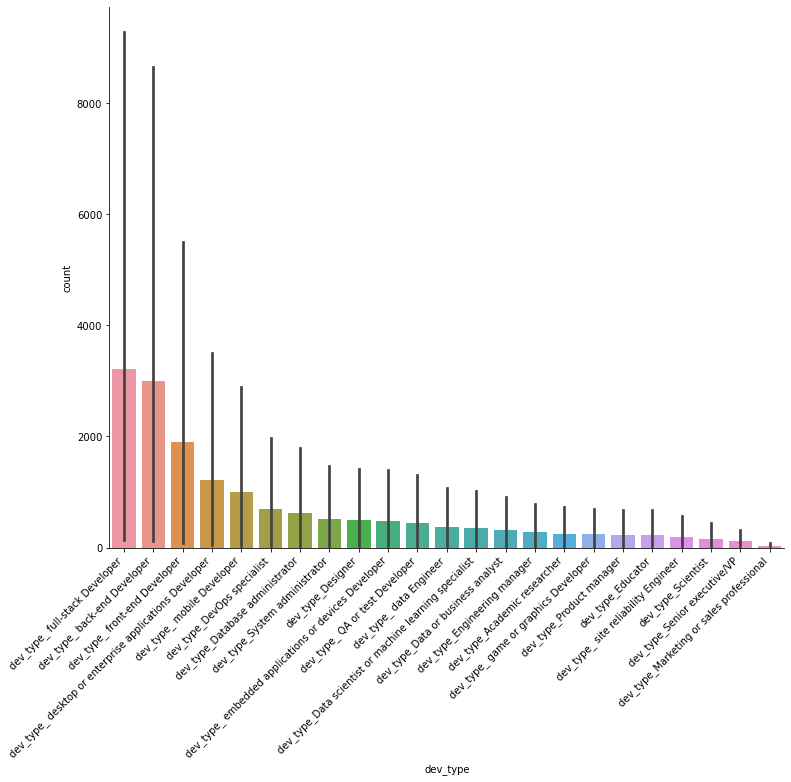

In [876]:
chart = sns.catplot(y="count", x="dev_type", kind="bar", 
            height=8.27, aspect=11.7/8.27,
            data=records_dict)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

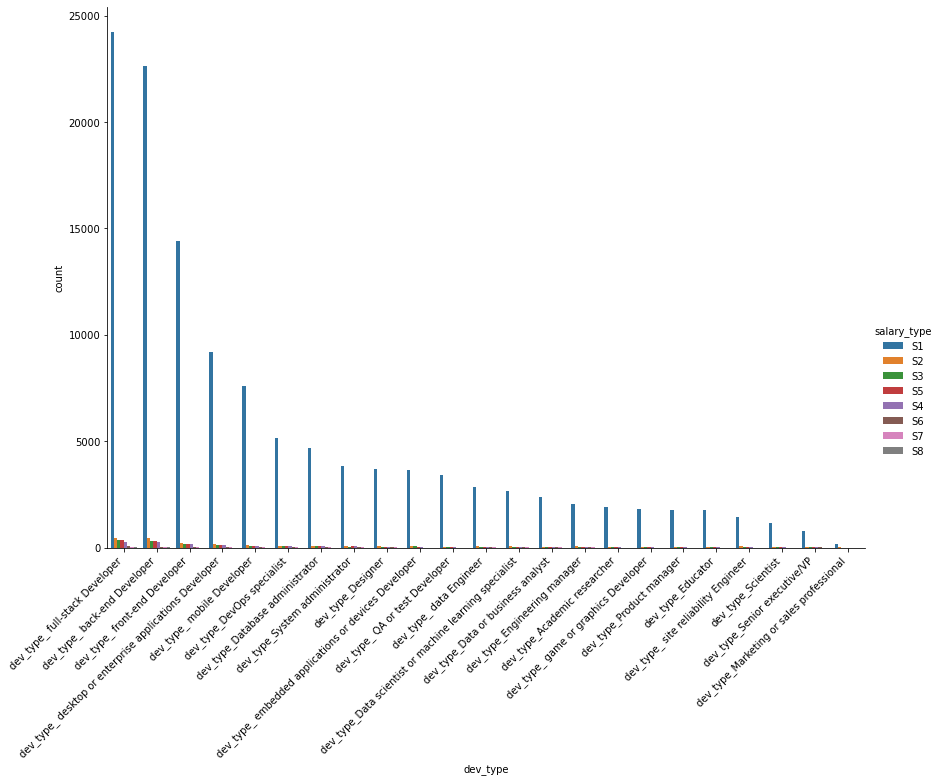

In [877]:
chart = sns.catplot(y="count", x="dev_type", kind="bar", hue="salary_type",
            height=8.27, aspect=11.7/8.27,
            data=records_dict)
chart.set_xticklabels(rotation=45, horizontalalignment='right')

Clearly, most individuals are employed as full-stack developers and back-end developers. So, we can conclude, most of the work force consists of individuals experienced in the field of web developement, followed by application developement.

### Q3. Which profession is the most rewarding in terms of salary?

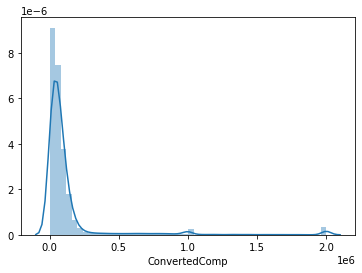

In [878]:
sns.distplot(df_with_only_devs_age_lim_55['ConvertedComp'])

## Data cleaning - Based on work week hours and compensation

The **ConvertedComp** column contains values less than 500 USD. In order to make sure, the values in this column lie in the valid range of salaries, I have considered values greated than or equal to 10000 USD.

Similarly, the **WorkWeekHrs** column cotains values less than 10. To make sure, we are dealing with correct data, I have considered only values greated than 40, which is 8 hours of work per day excluding the weekends in general for a professional developer

In [941]:
min_df_s_w = df_with_only_devs_age_lim_55[df_with_only_devs_age_lim_55['WorkWeekHrs'] >= 40]
min_df_s_w = min_df_s_w[min_df_s_w['ConvertedComp'] >= 10000]

In [880]:
records = {
    'dev_type': [],
    'expected_salary': [],
    'workhours': []
}

# Input variable: Dev type, country
for col in dev_type_columns:
    df_with_dev_types_col_set = min_df_s_w[min_df_s_w[col] == 1]
    # We take the median as ConvertedComp is left-skewed as shown above
    records['expected_salary'].append(df_with_dev_types_col_set['ConvertedComp'].median())
    # We take the median as WorkWeekHrs is left-skewed too
    records['workhours'].append(df_with_dev_types_col_set['WorkWeekHrs'].median())
    records['dev_type'].append(col)

records_dict =  pd.DataFrame.from_dict(records)
records_dict.head()

,dev_type,expected_salary,workhours
0,dev_type_ desktop or enterprise applications D...,64128.0,40.0
1,dev_type_ front-end Developer,60924.0,40.0
2,dev_type_Designer,61500.0,40.0
3,dev_type_ back-end Developer,64446.0,40.0
4,dev_type_ full-stack Developer,66666.0,40.0


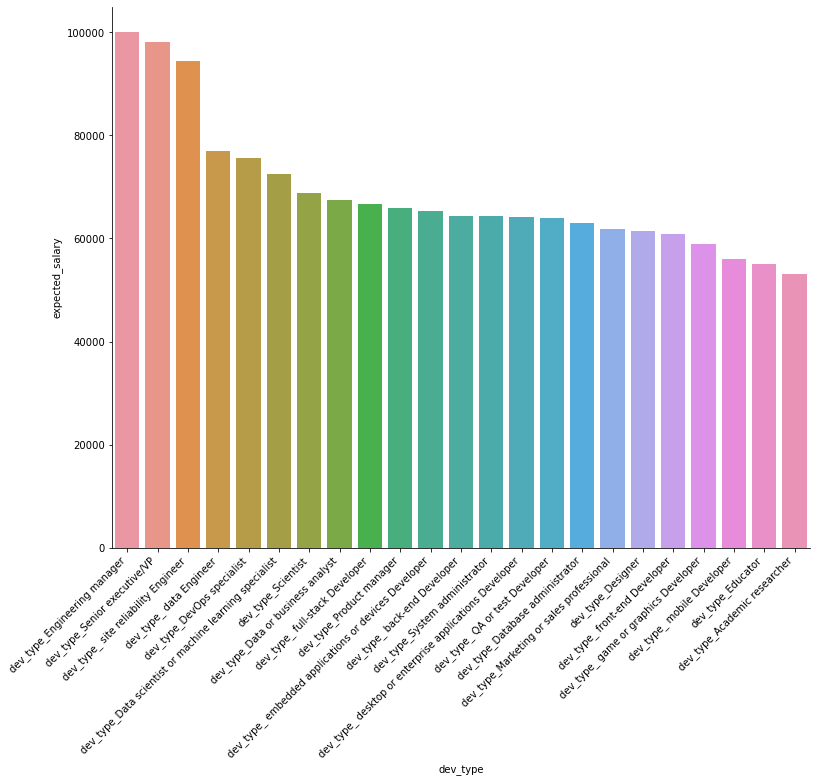

In [881]:
chart = sns.catplot(y="expected_salary", x="dev_type", kind="bar",
            height=8.27, aspect=11.7/8.27,
            data=records_dict.sort_values(by="expected_salary", ascending=False))
chart.set_xticklabels(rotation=45, horizontalalignment='right')

So, Engineering Manager and Senior executive/VP are the most paid individuals in terms of salary. Among individuals working in the field of data, Data Engineers are the most paid. Among individuals working in the field of web developement, full stack developers are the most paid.

### Q4. How does work load vary with compensation?

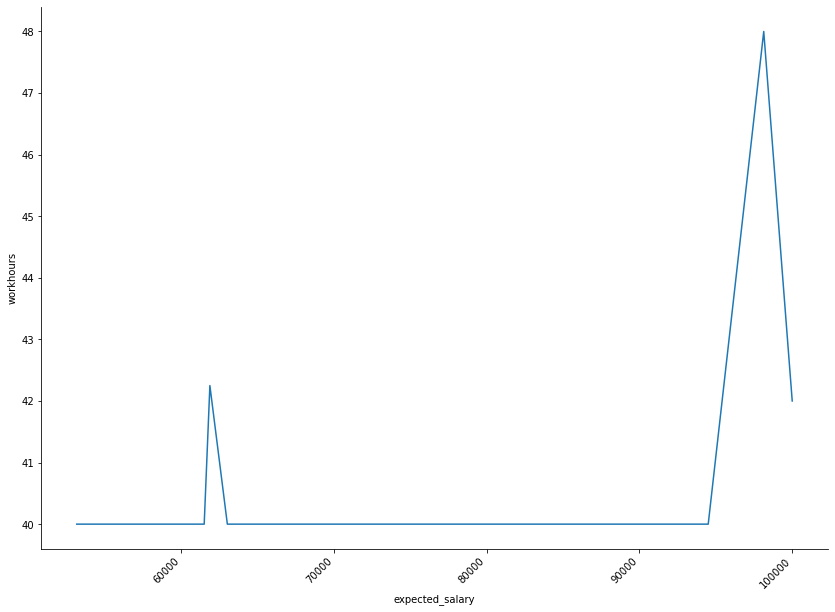

In [882]:
chart = sns.relplot(y="workhours", x="expected_salary", kind="line", ci=None,
            height=8.27, aspect=11.7/8.27,
            data=records_dict.sort_values(by="workhours", ascending=False))
chart.set_xticklabels(rotation=45, horizontalalignment='right')

We can't say much from the above graph, however, the individuals drawing higher salary end up working more as can be deduced from the graph

In [942]:
def find_features_and_create_columns(input_df, column_name, remove_values, prefix):
    """
    Creates new columns based on values of an existing column, cleans the data and adds these new columns to the dataframe
    Args:
        input_df -- Dataframe
        column_name -- { String } Column from which to create new columns
        remove_values -- { List } Values to be removed before creating new columns
        prefix -- { String } Prefix for the new column names
    Returns:
        A tuple of all extracted values, new column names and modified dataframe
    """
    input_df = input_df.dropna(subset=[column_name], axis=0)
    all_values = get_unique_values_list(input_df=input_df, 
                                         column_name=column_name, 
                                         remove_values=remove_values)
    print(all_values)
    new_cols = create_feature_columns(input_df=input_df,
                                          values=all_values,
                                          parent_col=column_name, 
                                          prefix=prefix)
    print(new_cols, input_df.columns)
    return all_values, new_cols, input_df

## Data cleaning - LanguageWorkedWith 

In [943]:
all_languages_worked_with, languages_worked_with_columns, min_df_s_w = \
                  find_features_and_create_columns(input_df=min_df_s_w, 
                                         column_name='LanguageWorkedWith', 
                                         remove_values=['nan', 'Other(s):'], 
                                         prefix='languages_worked_with_type_')

['Bash/Shell/PowerShell', 'HTML/CSS', 'JavaScript', 'PHP', 'SQL', 'TypeScript', 'C++', 'C#', 'VBA', 'Python', 'Ruby', 'Swift', 'Java', 'Objective-C', 'Go', 'Kotlin', 'C', 'R', 'Erlang', 'Assembly', 'Scala', 'Elixir', 'Dart', 'Clojure', 'Rust', 'F#', 'WebAssembly']


<ipython-input-900-dde717315dca>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[prefix+value] = new_df


['languages_worked_with_type_Bash/Shell/PowerShell', 'languages_worked_with_type_HTML/CSS', 'languages_worked_with_type_JavaScript', 'languages_worked_with_type_PHP', 'languages_worked_with_type_SQL', 'languages_worked_with_type_TypeScript', 'languages_worked_with_type_C++', 'languages_worked_with_type_C#', 'languages_worked_with_type_VBA', 'languages_worked_with_type_Python', 'languages_worked_with_type_Ruby', 'languages_worked_with_type_Swift', 'languages_worked_with_type_Java', 'languages_worked_with_type_Objective-C', 'languages_worked_with_type_Go', 'languages_worked_with_type_Kotlin', 'languages_worked_with_type_C', 'languages_worked_with_type_R', 'languages_worked_with_type_Erlang', 'languages_worked_with_type_Assembly', 'languages_worked_with_type_Scala', 'languages_worked_with_type_Elixir', 'languages_worked_with_type_Dart', 'languages_worked_with_type_Clojure', 'languages_worked_with_type_Rust', 'languages_worked_with_type_F#', 'languages_worked_with_type_WebAssembly'] Index(

## Data cleaning - DatabaseWorkedWith

In [944]:
all_databases_worked_with, databases_worked_with_columns, min_df_s_w = \
                  find_features_and_create_columns(input_df=min_df_s_w, 
                                         column_name='DatabaseWorkedWith', 
                                         remove_values=['nan', 'Other(s):'], 
                                         prefix='databases_worked_with_type_')

['Couchbase', 'DynamoDB', 'Firebase', 'MySQL', 'MongoDB', 'Microsoft SQL Server', 'PostgreSQL', 'Elasticsearch', 'Oracle', 'Redis', 'SQLite', 'MariaDB', 'Cassandra']
['databases_worked_with_type_Couchbase', 'databases_worked_with_type_DynamoDB', 'databases_worked_with_type_Firebase', 'databases_worked_with_type_MySQL', 'databases_worked_with_type_MongoDB', 'databases_worked_with_type_Microsoft SQL Server', 'databases_worked_with_type_PostgreSQL', 'databases_worked_with_type_Elasticsearch', 'databases_worked_with_type_Oracle', 'databases_worked_with_type_Redis', 'databases_worked_with_type_SQLite', 'databases_worked_with_type_MariaDB', 'databases_worked_with_type_Cassandra'] Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       ...
       'databases_worked_with_type_MySQL',
       'databases_worked_with_type_MongoDB',
       'databases_worked_with_type_Microsoft SQL Server',
       'data

<ipython-input-900-dde717315dca>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[prefix+value] = new_df


## Data cleaning - WebFrameWorkedWith

In [945]:
all_frameworks_worked_with, frameworks_worked_with_columns, min_df_s_w = \
                  find_features_and_create_columns(input_df=min_df_s_w, 
                                         column_name='WebFrameWorkedWith', 
                                         remove_values=['nan', 'Other(s):'], 
                                         prefix='frameworks_worked_with_type_')

['Angular/Angular.js', 'ASP.NET', 'Express', 'jQuery', 'Vue.js', 'Spring', 'Ruby on Rails', 'React.js', 'Drupal', 'Django', 'Flask', 'Laravel']
['frameworks_worked_with_type_Angular/Angular.js', 'frameworks_worked_with_type_ASP.NET', 'frameworks_worked_with_type_Express', 'frameworks_worked_with_type_jQuery', 'frameworks_worked_with_type_Vue.js', 'frameworks_worked_with_type_Spring', 'frameworks_worked_with_type_Ruby on Rails', 'frameworks_worked_with_type_React.js', 'frameworks_worked_with_type_Drupal', 'frameworks_worked_with_type_Django', 'frameworks_worked_with_type_Flask', 'frameworks_worked_with_type_Laravel'] Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       ...
       'frameworks_worked_with_type_Express',
       'frameworks_worked_with_type_jQuery',
       'frameworks_worked_with_type_Vue.js',
       'frameworks_worked_with_type_Spring',
       'frameworks_worked_with_type_

<ipython-input-900-dde717315dca>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df[prefix+value] = new_df


In [946]:
min_df_s_w.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       ...
       'frameworks_worked_with_type_Express',
       'frameworks_worked_with_type_jQuery',
       'frameworks_worked_with_type_Vue.js',
       'frameworks_worked_with_type_Spring',
       'frameworks_worked_with_type_Ruby on Rails',
       'frameworks_worked_with_type_React.js',
       'frameworks_worked_with_type_Drupal',
       'frameworks_worked_with_type_Django',
       'frameworks_worked_with_type_Flask',
       'frameworks_worked_with_type_Laravel'],
      dtype='object', length=169)

In [947]:
print(dev_type_columns)

['dev_type_ desktop or enterprise applications Developer', 'dev_type_ front-end Developer', 'dev_type_Designer', 'dev_type_ back-end Developer', 'dev_type_ full-stack Developer', 'dev_type_Academic researcher', 'dev_type_ mobile Developer', 'dev_type_Data or business analyst', 'dev_type_Data scientist or machine learning specialist', 'dev_type_Database administrator', 'dev_type_ data Engineer', 'dev_type_ site reliability Engineer', 'dev_type_ QA or test Developer', 'dev_type_DevOps specialist', 'dev_type_ game or graphics Developer', 'dev_type_Educator', 'dev_type_Engineering manager', 'dev_type_Senior executive/VP', 'dev_type_System administrator', 'dev_type_ embedded applications or devices Developer', 'dev_type_Product manager', 'dev_type_Scientist', 'dev_type_Marketing or sales professional']


In [948]:
def get_tools_summary(input_df, prefix='', professions=[], data=[]):
    """
    Get a summary of tools used by profession
    Args:
        input_df -- Input dataframe
        prefix -- { String } Look into columns prefixed with this string
        professions -- { List } A list of professions
        data -- { List } A list of valid values to look for in the data frame to reduce conclusion
    Returns:
        A dataframe containing information about the tools summary
    """
    tools = {}
    for dev_type in professions:
        df_dev_type = input_df[input_df[dev_type] == 1]
        for idx, row in df_dev_type.iterrows():
            for val in data:
                if val not in tools:
                    tools[val] = 0
                tools[val] += row[prefix+val]

    new_dict = {
        'tools': [],
        'values': []
    }
    
    total = sum(tools.values())

    for tool in tools:
        new_dict['tools'].append(tool)
        new_dict['values'].append(100*tools[tool]/total)
    
    return pd.DataFrame.from_dict(new_dict)

### Q5. What web frameworks are most used by web developers?

In [949]:
web_developers = [
    'dev_type_ front-end Developer',
    'dev_type_ back-end Developer',
    'dev_type_ full-stack Developer'
]

web_developer_summary = get_tools_summary(input_df=min_df_s_w, 
                                          prefix='frameworks_worked_with_type_', 
                                          professions=web_developers, 
                                          data=all_frameworks_worked_with)

In [950]:
web_developer_summary.head()

,tools,values
0,Angular/Angular.js,14.493269
1,ASP.NET,12.385620
2,Express,8.656310
3,jQuery,19.351133
4,Vue.js,6.963480


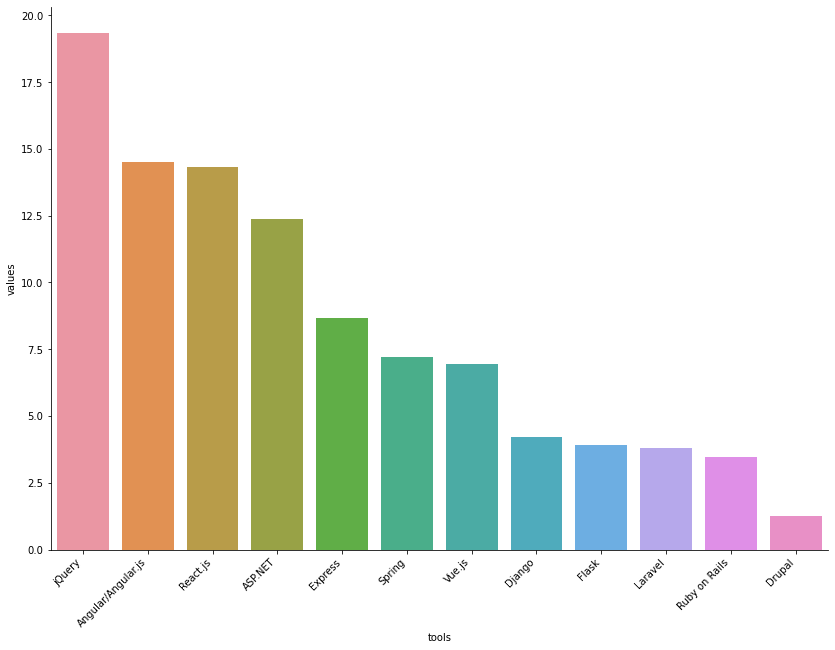

In [951]:
chart = sns.catplot(y="values", x="tools", kind="bar",
            height=8.27, aspect=11.7/8.27,
            data=web_developer_summary.sort_values(by="values", ascending=False))
chart.set_xticklabels(rotation=45, horizontalalignment='right')

jQuery is the most used by web developers followed by Angular/Angular.js and then React.js

### Q6. Which languages are most used by data scientists?

In [952]:
data_scientists = [
    'dev_type_Data scientist or machine learning specialist',
]

data_scientists_summary = get_tools_summary(input_df=min_df_s_w, 
                                          prefix='languages_worked_with_type_', 
                                          professions=data_scientists, 
                                          data=all_languages_worked_with)

In [953]:
data_scientists_summary.head()

,tools,values
0,Bash/Shell/PowerShell,7.753814
1,HTML/CSS,8.890058
2,JavaScript,9.963177
3,PHP,2.777486
4,SQL,9.921094


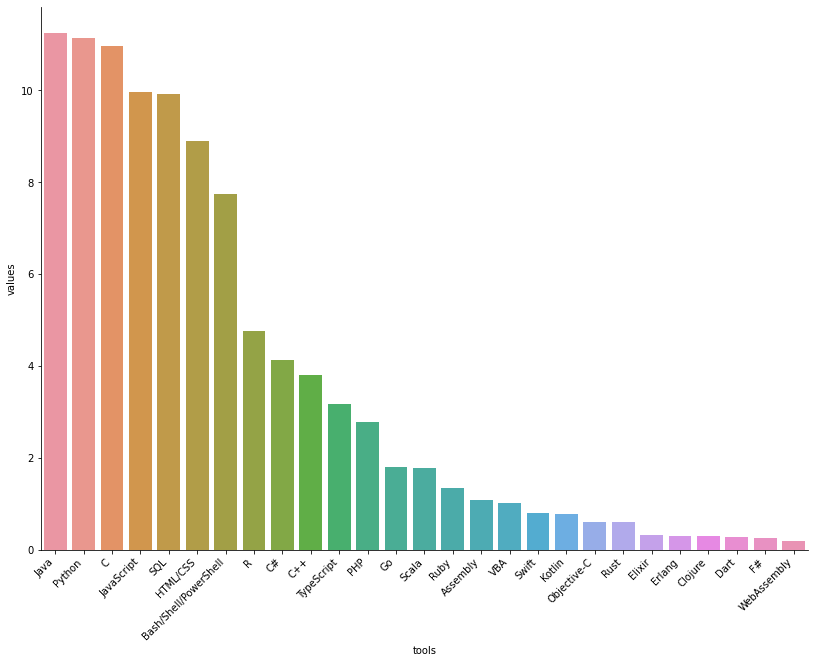

In [954]:
chart = sns.catplot(y="values", x="tools", kind="bar",
            height=8.27, aspect=11.7/8.27,
            data=data_scientists_summary.sort_values(by="values", ascending=False))
chart.set_xticklabels(rotation=45, horizontalalignment='right')

Data scientists mostly work with Java, followed by Python, C, and JavaScript

### Q7. What languages are most used by people working with data?

In [955]:
data_scientists = [
    'dev_type_Data scientist or machine learning specialist',
    'dev_type_Data or business analyst',
    'dev_type_ data Engineer'
]

data_scientists_summary = get_tools_summary(input_df=min_df_s_w, 
                                          prefix='languages_worked_with_type_', 
                                          professions=data_scientists, 
                                          data=all_languages_worked_with)

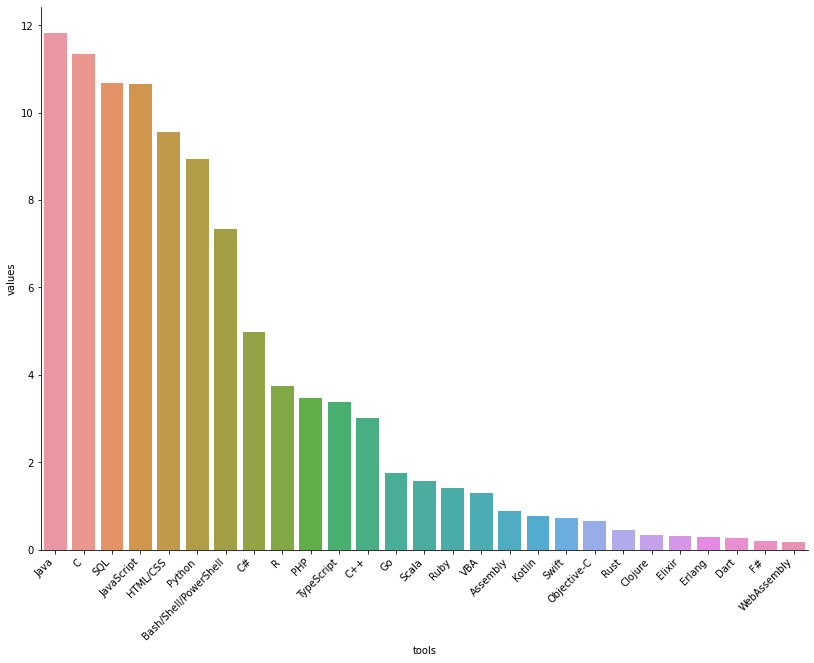

In [956]:
chart = sns.catplot(y="values", x="tools", kind="bar",
            height=8.27, aspect=11.7/8.27,
            data=data_scientists_summary.sort_values(by="values", ascending=False))
chart.set_xticklabels(rotation=45, horizontalalignment='right')

People working with data prefer Java, C, SQL, JavaScript, HTML/CSS and Python in that order.

### Q8. What languages are most used by mobile developers?

In [957]:
mobile_developer = [
    'dev_type_ mobile Developer'
]

mobile_developer_summary = get_tools_summary(input_df=min_df_s_w, 
                                          prefix='languages_worked_with_type_', 
                                          professions=mobile_developer, 
                                          data=all_languages_worked_with)

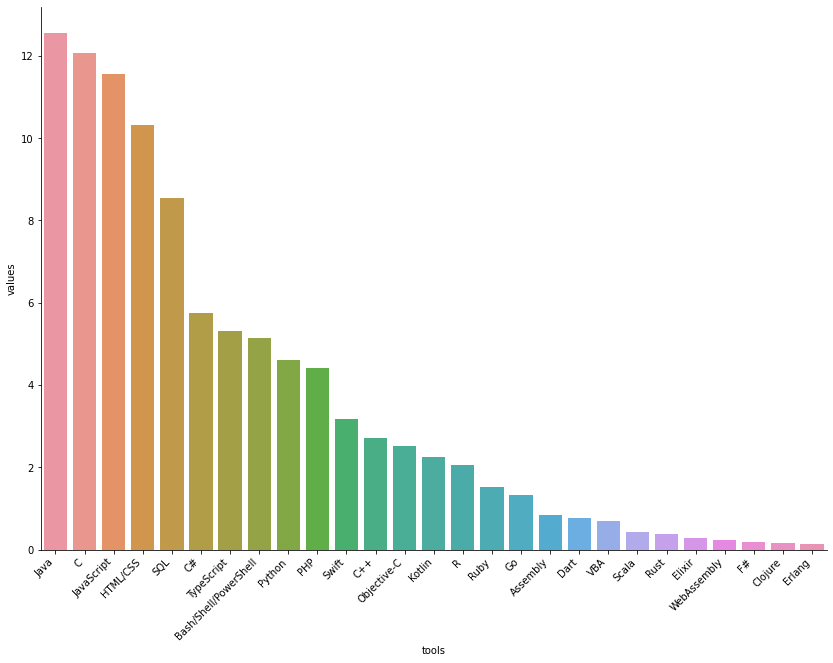

In [958]:
chart = sns.catplot(y="values", x="tools", kind="bar",
            height=8.27, aspect=11.7/8.27,
            data=mobile_developer_summary.sort_values(by="values", ascending=False))
chart.set_xticklabels(rotation=45, horizontalalignment='right')

Mobile developers mostly prefer Java, C and JavaScript.